In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np

## read db file

In [2]:
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [3]:
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

In [4]:
def db_delete(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            cur = con.cursor()
            sql = 'DELETE FROM {}'.format(table_name)
            cur.execute(sql)
        except Exception as e:
            print(str(e))

In [5]:
def word_tokens(string):

    tokens_const = []

    for i in string.split(','):
        tokens_const.append(i)

    # 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
    const_word_count = dict()
    for word in tokens_const:
        const_word_count[word] = const_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
    sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

    n = sorted_word_count[:] # 빈도수 상위 20개의 단어를 추출
    w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도

    full_list = []

    for i in n,w:
        full_list.append(i)

    return full_list

# save the hannanum word tokens into a file

In [6]:
DB_NAME = '법제동향DB.db'
TABLE_NAME = '법제동향'
df = db_select(DB_NAME,TABLE_NAME)

In [7]:
temp_df = df.copy()

strings_t = []
strings_c = []

for i in temp_df.iloc[:,5]:
    string_token = ""
    string_count = ""
    
    token_set = word_tokens(i)
    string_token = ",".join(token_set[0])
    
    n = map(str,token_set[1])
    n = list(n)
    string_count = ",".join(n)

    strings_t.append(string_token)
    strings_c.append(string_count)
    
temp_df['tokens'] = strings_t
temp_df['counts'] = strings_c

temp_df.iloc[:,[0,6,7]]

,제목,tokens,counts
0,"카자흐스탄 대통령, 2023년 최저임금 인상","인상,카자흐스탄,최저임금,대통령,채택,계획,텡게한화,구축,완료,정책,입법동향,조마르...","6,5,5,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
1,"말레이시아, 개정 고용법 시행 연기","고용법,시행,개정,연기,확대,도입,제공,말레이시,입법동향,말레이시아,발의,하원,상원...","7,7,5,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,"마카오, 원숭이두창을 《전염병 강제신고》 대상으로 지정","마카오,법제동향,원숭이두창,전염병,강제신고,지정,카지노,영업중단,사진","3,1,1,1,1,1,1,1,1"
3,형사미성년자에 대한 세계 각국의 연령 기준 및 관련 법령,"미만,범죄,아동,연령,형사미성년자,미성년자,소년,행위,형법,선고,우리나라,처벌,중대...","37,31,25,18,14,13,10,9,9,8,7,7,7,6,6,6,6,6,6,5..."
4,"독일, 기업조직재편에 관한 유럽연합지침의 국내도입을 위한 법안 결의","합병,법안,유럽,기업,형태변경,국경,초월,국내법,제정,주식회사,소액주주,권리,주식,...","4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,..."
...,...,...,...
5995,이주법 공포,"이주법,이주,대통령,공포,멕시코,여건,멕시코입법동향,펠리페,칼데론,이노호사Felip...","4,4,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
5996,노선 택시 정비 방안 채택,"택시,노선,차량,우즈베키스탄,번호,정비,방안,채택,강제,정부,사용,승객,입법동향,공...","9,7,4,3,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,..."
5997,부동산업 면허증제 도입,"부동산,부동산업,면허,물건,제공,권리,기관,종사,정관,자본금,최저급여액,우즈베키스탄...","10,8,6,6,5,5,5,4,4,4,4,3,3,3,3,3,3,2,2,2,2,2,2..."
5998,벨라루스와 우즈베키스탄 국제 자동차 운송 허가 쿼터 동의,"우즈베키스탄,벨라루스,자동차,운송,국제,공화국,협력,확대,허가서,허가,쿼터,정보,증...","10,10,7,7,6,5,4,4,4,3,3,3,3,3,3,3,2,2,2,2,2,2,..."


In [8]:
db_save(temp_df, '법제동향DB.db', '법제토큰')
#db_save_as_csv(temp_df)

6000 건 저장완료..


In [9]:
df1 = db_select('법제동향DB.db', '법제토큰')
df1 = df1.iloc[:,[0,5]].copy()
df1

,제목,BoW
0,"카자흐스탄 대통령, 2023년 최저임금 인상","카자흐스탄,입법동향,카자흐스탄,대통령,최저임금,인상,조마르트,토카예프,카자흐스탄,대..."
1,"말레이시아, 개정 고용법 시행 연기","말레이시,입법동향,말레이시아,개정,고용법,시행,연기,시행,개정,고용법,시행,연기,개..."
2,"마카오, 원숭이두창을 《전염병 강제신고》 대상으로 지정","마카오,법제동향,마카오,원숭이두창,전염병,강제신고,지정,마카오,카지노,영업중단,사진"
3,형사미성년자에 대한 세계 각국의 연령 기준 및 관련 법령,"형사미성년자,세계,각국,연령,기준,법령,우리나라,미만,자형사미성년자,범죄,조각,형법..."
4,"독일, 기업조직재편에 관한 유럽연합지침의 국내도입을 위한 법안 결의","입법동향,기업조직재편,유럽연합지침,국내도입,법안,유럽,기업,형태변경,합병,분할,유럽..."
...,...,...
5995,이주법 공포,"멕시코입법동향,이주법,공포,펠리페,칼데론,이노호사Felipe,Calderón,멕시코..."
5996,노선 택시 정비 방안 채택,"우즈베키스탄,입법동향,노선,택시,정비,방안,채택,우즈베키스탄,공화국,노선,택시,외관..."
5997,부동산업 면허증제 도입,"우즈베키스탄,입법동향,부동산업,면허증제,도입,우즈베키스탄,정부,시행,부동산업,면허,..."
5998,벨라루스와 우즈베키스탄 국제 자동차 운송 허가 쿼터 동의,"우즈베키스탄,입법동향,벨라루스,우즈베키스탄,국제,자동차,운송,허가,쿼터,벨라루스,우..."


# 단어의 총 등장 횟수 구하기

In [10]:
total_t = dict()

for i in df.iloc[:,5]:
    tokens_const = []
    
    for j in i.split(','):
        tokens_const.append(j)
    
    for each_t in tokens_const:
        if each_t in total_t.keys():
            total_t[each_t] += 1
        else :
            total_t[each_t] = 1

In [11]:
total_t_list = sorted(total_t.items(), key=lambda x:x[1], reverse=True)
orderdict = dict(total_t_list)
orderdict

{'규정': 4377,
 '개정': 4245,
 '법안': 4089,
 '법률': 4074,
 '입법동향': 3969,
 '러시아': 3420,
 '정부': 3066,
 '연방': 2613,
 '시행': 2382,
 '카자흐스탄': 1983,
 '제정': 1929,
 '법령': 1815,
 '개정안': 1785,
 '러시': 1596,
 '공화국': 1557,
 '목적': 1509,
 '금지': 1482,
 '절차': 1479,
 '사용': 1470,
 '보호': 1452,
 '제공': 1431,
 '근로자': 1377,
 '벌금': 1368,
 '채택': 1278,
 '제출': 1263,
 '필요': 1260,
 '처벌': 1254,
 '권리': 1209,
 '강화': 1206,
 '서비스': 1188,
 '대통령': 1173,
 '기업': 1173,
 '승인': 1170,
 '행위': 1146,
 '정보': 1140,
 '베트남': 1107,
 '도입': 1104,
 '기관': 1077,
 '통과': 1059,
 '공포': 1011,
 '의회': 996,
 '위반': 987,
 '국가': 975,
 '조항': 969,
 '지원': 948,
 '외국': 939,
 '부문': 939,
 '활동': 930,
 '이용': 918,
 '마련': 903,
 '제품': 894,
 '조치': 858,
 '부과': 840,
 '범죄': 828,
 '미국': 825,
 '관리': 822,
 '등록': 822,
 '하원': 816,
 '우즈베키스탄': 804,
 '중국': 798,
 '기준': 786,
 '지역': 786,
 '기간': 780,
 '위원회': 768,
 '우크라': 753,
 '회의': 747,
 '확대': 735,
 '가능': 735,
 '장관': 732,
 '기존': 729,
 '국회': 723,
 '설립': 717,
 '경제': 714,
 '서명': 714,
 '규제': 714,
 '여성': 711,
 '법원': 705,
 '최대': 705,
 '계획':

In [12]:
# using loop to iterate keys of dictionary
#new_dict = {}
#for key in orderdict:
#    if not (isinstance(orderdict[key], int) and orderdict[key] > 500):
#        new_dict[key] = orderdict[key]
#new_dict

## row 하나에 단어 하나 이상 있을 수 있는 비율 계산

In [13]:
DB_NAME = '법제동향DB.db'
TABLE_NAME = '법제토큰'
df = db_select(DB_NAME,TABLE_NAME)

In [14]:
wordUsage = dict()     # dictionary for the rate of how many articles have this word

for key in orderdict:
    exis = 0
    
    for eachRow in df1.iloc[:,1]:
        tokens_const = []
    
        for j in eachRow.split(','):
            tokens_const.append(j)

        if (str(key) in tokens_const):
            exis += 1
            
    wordUsage[key] = exis/len(df)*100     # gets the percentage of articles that have the word

In [15]:
wordUsage_list = sorted(wordUsage.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered = dict(wordUsage_list)

wordC_df = pd.DataFrame()
wordC_df['keys'] = list(wordUsage_ordered.keys())
wordC_df['frequency'] = list(wordUsage_ordered.values())

db_save(wordC_df, '법제동향DB.db','법제토큰_freq')
wordC_df

24488 건 저장완료..


,keys,frequency
0,입법동향,66.10
1,규정,34.65
2,개정,33.50
3,법률,29.60
4,정부,27.85
...,...,...
24483,염원,0.05
24484,컨트롤,0.05
24485,통행세,0.05
24486,루트,0.05


In [16]:
new_val = wordUsage_ordered['러시아'] + wordUsage_ordered['러시']
wordUsage_ordered['러시아'] = new_val
wordUsage_ordered.pop('러시')

wordUsage_ordered2 = sorted(wordUsage_ordered.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered3 = dict(wordUsage_ordered)

wordC_df = pd.DataFrame()
wordC_df['keys'] = list(wordUsage_ordered3.keys())
wordC_df['frequency'] = list(wordUsage_ordered3.values())

db_save(wordC_df, '법제동향DB.db','법제토큰_freq_edited')
wordC_df

24487 건 저장완료..


,keys,frequency
0,입법동향,66.10
1,규정,34.65
2,개정,33.50
3,법률,29.60
4,정부,27.85
...,...,...
24482,염원,0.05
24483,컨트롤,0.05
24484,통행세,0.05
24485,루트,0.05


In [17]:
# 가중치 줘보기
orderdict_values = orderdict.values()
total_sum = sum(orderdict_values)
dict_word_usage = dict()

for key in wordUsage_ordered3:
    dict_word_usage[key] = wordUsage_ordered3[key]*((orderdict[key]/total_sum))
    
sort_list = sorted(wordUsage_ordered.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered4 = dict(sort_list)
wordUsage_ordered4

{'입법동향': 66.10000000000001,
 '러시아': 44.25,
 '규정': 34.65,
 '개정': 33.5,
 '법률': 29.599999999999998,
 '정부': 27.85,
 '법안': 26.450000000000003,
 '시행': 26.05,
 '제정': 21.349999999999998,
 '목적': 19.6,
 '연방': 18.75,
 '법령': 18.099999999999998,
 '절차': 17.1,
 '승인': 16.0,
 '필요': 15.4,
 '채택': 15.049999999999999,
 '제공': 14.799999999999999,
 '사용': 14.149999999999999,
 '보호': 14.149999999999999,
 '개정안': 14.099999999999998,
 '제출': 14.05,
 '통과': 13.200000000000001,
 '강화': 13.100000000000001,
 '대통령': 12.75,
 '금지': 12.7,
 '도입': 12.0,
 '기관': 11.75,
 '권리': 11.5,
 '공포': 11.450000000000001,
 '국가': 11.3,
 '의회': 11.1,
 '마련': 10.75,
 '공화국': 10.65,
 '이용': 10.299999999999999,
 '서비스': 9.700000000000001,
 '추가': 9.700000000000001,
 '부문': 9.65,
 '활동': 9.6,
 '조치': 9.5,
 '조항': 9.45,
 '가능': 9.4,
 '정보': 9.35,
 '지원': 9.35,
 '서명': 9.0,
 '처벌': 8.95,
 '관리': 8.95,
 '확대': 8.9,
 '벌금': 8.799999999999999,
 '기업': 8.799999999999999,
 '국회': 8.799999999999999,
 '위반': 8.75,
 '기존': 8.649999999999999,
 '회의': 8.6,
 '장관': 8.6,
 '카자흐스탄': 8.450

In [18]:
# 가중치 줘보기
wordusage_values = wordUsage_ordered.values()
total_sum = sum(wordusage_values)
dict_word_usage2 = dict()

for key in wordUsage_ordered4:
    dict_word_usage2[key] = orderdict[key]*((wordUsage_ordered4[key]/total_sum))

new_sum = sum(dict_word_usage2.values())
for key in dict_word_usage2:
    dict_word_usage2[key] =  dict_word_usage2[key]/new_sum*100
    
sort_list = sorted(dict_word_usage2.items(), key=lambda x:x[1], reverse=True)
wordUsage_ordered5 = dict(sort_list)
wordUsage_ordered5

{'입법동향': 10.427402188887399,
 '규정': 6.028001503114108,
 '러시아': 6.01496282366584,
 '개정': 5.652181093246506,
 '법률': 4.792987563293311,
 '법안': 4.298692238932809,
 '정부': 3.393836502352141,
 '시행': 2.4662838052504146,
 '연방': 1.9473062070372238,
 '제정': 1.636905746683038,
 '법령': 1.3057161344147643,
 '목적': 1.1755439684003726,
 '절차': 1.0052124312092405,
 '개정안': 1.0003475192614641,
 '제공': 0.8417728526107912,
 '사용': 0.826736936027101,
 '보호': 0.8166136266063609,
 '필요': 0.7712316293680377,
 '채택': 0.764470832617084,
 '금지': 0.7480756024009266,
 '승인': 0.7440453567187005,
 '제출': 0.7052989562914984,
 '카자흐스탄': 0.6659980989878953,
 '공화국': 0.6590703689838315,
 '강화': 0.6279313553769265,
 '대통령': 0.5944314286188945,
 '통과': 0.5556015615651373,
 '권리': 0.5526086868129515,
 '도입': 0.5265551755240034,
 '기관': 0.5029758535222209,
 '벌금': 0.47847839862833347,
 '공포': 0.460097855080547,
 '서비스': 0.4580171513185693,
 '처벌': 0.4460814237212068,
 '의회': 0.4394160174006017,
 '국가': 0.4379016943188185,
 '정보': 0.42365274878550363,


In [19]:
print(list(wordUsage_ordered5.keys())[:15])
print(list(wordUsage_ordered4.keys())[:15])
print(list(wordUsage_ordered3.keys())[:15])

['입법동향', '규정', '러시아', '개정', '법률', '법안', '정부', '시행', '연방', '제정', '법령', '목적', '절차', '개정안', '제공']
['입법동향', '러시아', '규정', '개정', '법률', '정부', '법안', '시행', '제정', '목적', '연방', '법령', '절차', '승인', '필요']
['입법동향', '규정', '개정', '법률', '정부', '법안', '시행', '제정', '러시아', '목적', '연방', '법령', '절차', '승인', '필요']


### drop keys where the word does not have a significant meaning

In [20]:
# using loop to iterate keys of dictionary
#new_dict2 = {}
#for key in wordUsage_ordered:
#    if not (isinstance(orderdict[key], int) and orderdict[key] > 3):
#        new_dict2[key] = wordUsage_ordered[key]
#new_dict2

## graph of hannanum

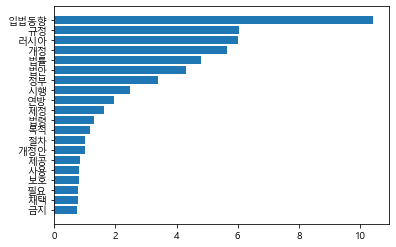

In [21]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# plt.barh로 그래프 출력
n = list(wordUsage_ordered5.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(wordUsage_ordered5.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

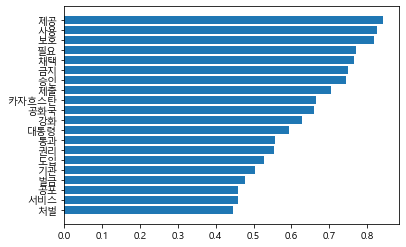

In [22]:
# plt.barh로 그래프 출력
new_dict_new1 = {}
for key in wordUsage_ordered5:
    #if not (isinstance(wordUsage_ordered3[key], int) and wordUsage_ordered3[key] > 1):
    if not (wordUsage_ordered5[key] > 1):
        new_dict_new1[key] = wordUsage_ordered5[key]

n = list(new_dict_new1.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(new_dict_new1.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

In [23]:
# 단어별 빈도를 담을 딕셔너리 생성
tokens_const = list(wordUsage_ordered5.keys())
tokens_const_count = list(wordUsage_ordered5.values())

i_count = map(int, tokens_const_count)
tokens_const_count = list(i_count)

token_word_count = dict(zip(tokens_const, tokens_const_count))

In [24]:
#wordUsage_ordered4.pop('입법동향')

# 단어별 빈도를 담을 딕셔너리 생성
tokens_const = list(wordUsage_ordered4.keys())
tokens_const_count = list(np.array(list(wordUsage_ordered4.values()))*1000)

i_count = map(int, tokens_const_count)
tokens_const_count = list(i_count)

token_word_count = dict(zip(tokens_const, tokens_const_count))

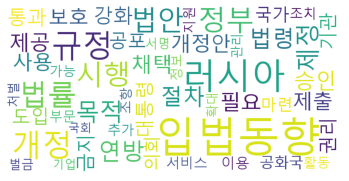

In [25]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count)
wordcloud.to_file('법제동향1.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

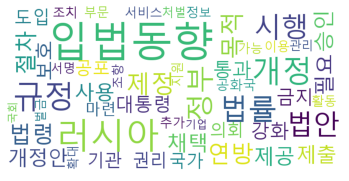

In [26]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count)
wordcloud.to_file('법제동향2.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### 단어 분포 탐색

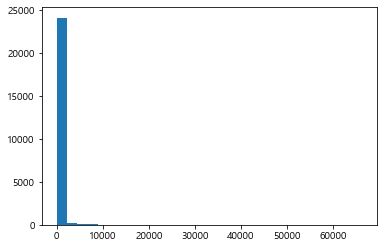

In [27]:
plt.hist(list(token_word_count.values()), bins=30)
plt.show()